In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

In [17]:
df = pd.read_excel('../dataset/Data_Siswa_PKBM_Orange_Dummy.xlsx')
df.head()

,Nama,JK,Agama,Alat Transportasi,Kebutuhan Khusus,Pekerjaan Orang Tua,Usia,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,Aas Ariska,L,Islam,Jalan kaki,Tidak ada,Wirausaha,12,4213001,1,Tidak,Tidak,Tidak Layak
1,ABDUL GHOFUR,L,Islam,Sepeda motor,Tidak ada,Lainnya,9,3249958,Lebih dari 3,Tidak,Tidak,Layak
2,ABDUL RAHMAN,L,Islam,Jalan kaki,Tidak ada,Peternak,16,4166323,2,Tidak,Tidak,Tidak Layak
3,ABU BAKAR,L,Islam,Jalan kaki,Tidak ada,Lainnya,13,3261966,2,Tidak,Tidak,Tidak Layak
4,ADI MARLANGGA,L,Islam,Sepeda motor,Tidak ada,Wirausaha,10,3254943,Lebih dari 3,Tidak,Tidak,Layak


# EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Nama                   1000 non-null   object
 1   JK                     1000 non-null   object
 2   Agama                  1000 non-null   object
 3   Alat Transportasi      1000 non-null   object
 4   Kebutuhan Khusus       1000 non-null   object
 5   Pekerjaan Orang Tua    1000 non-null   object
 6   Usia                   1000 non-null   int64 
 7   Penghasilan Orang Tua  1000 non-null   int64 
 8   Jumlah Tanggungan      1000 non-null   object
 9   Pemilik KIP            1000 non-null   object
 10  Pemilik KPS            1000 non-null   object
 11  Status                 1000 non-null   object
dtypes: int64(2), object(10)
memory usage: 93.9+ KB


In [19]:
# hapus kolom yang tidak diperlukan
df.drop(
    columns=[
        'Nama', 
        'JK',
        'Agama',
        'Kebutuhan Khusus',
        'Usia'
    ], 
    inplace=True
)


In [20]:
df.describe()

,Penghasilan Orang Tua
count,1.000000e+03
mean,2.722912e+06
std,1.264392e+06
min,5.078810e+05
25%,1.688386e+06
50%,2.640530e+06
75%,3.842525e+06
max,4.990155e+06


In [21]:
# cek kolom kosong
df.isnull().sum()

Alat Transportasi        0
Pekerjaan Orang Tua      0
Penghasilan Orang Tua    0
Jumlah Tanggungan        0
Pemilik KIP              0
Pemilik KPS              0
Status                   0
dtype: int64

In [22]:
# Cek Data Duplikat
df.duplicated().sum()

0

In [23]:
# Hapus baris duplicate
df = df.drop_duplicates()


In [24]:
df.duplicated().sum()

0

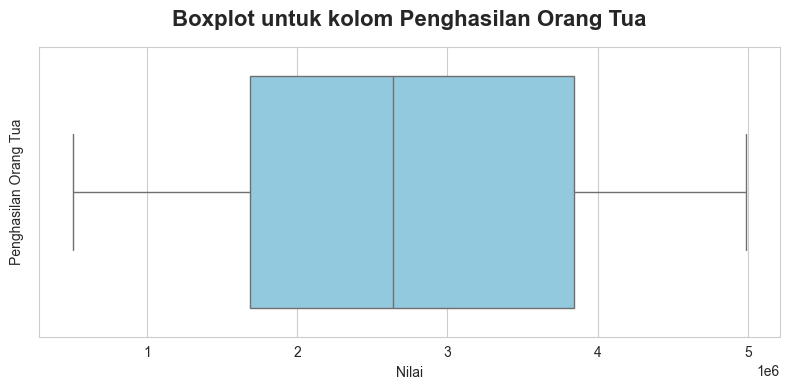

In [25]:
# tampilkan boxplot dari numerik kolom
nums_kolom = df.select_dtypes(include=['number']).columns

sns.set_style("whitegrid")

for col in nums_kolom:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="skyblue", orient="h")
    plt.title(f"Boxplot untuk kolom {col}", fontsize=16, weight='bold', pad=15)
    plt.xlabel("Nilai")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

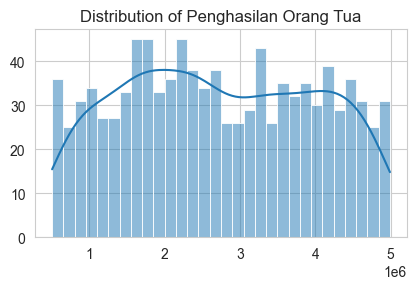

In [26]:
def plot_numerical_distributions_grid(data, columns, cols=3):
    rows = (len(columns) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten() 

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Hilangkan subplot kosong jika ada
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Panggil fungsi
plot_numerical_distributions_grid(df, nums_kolom, cols=3)

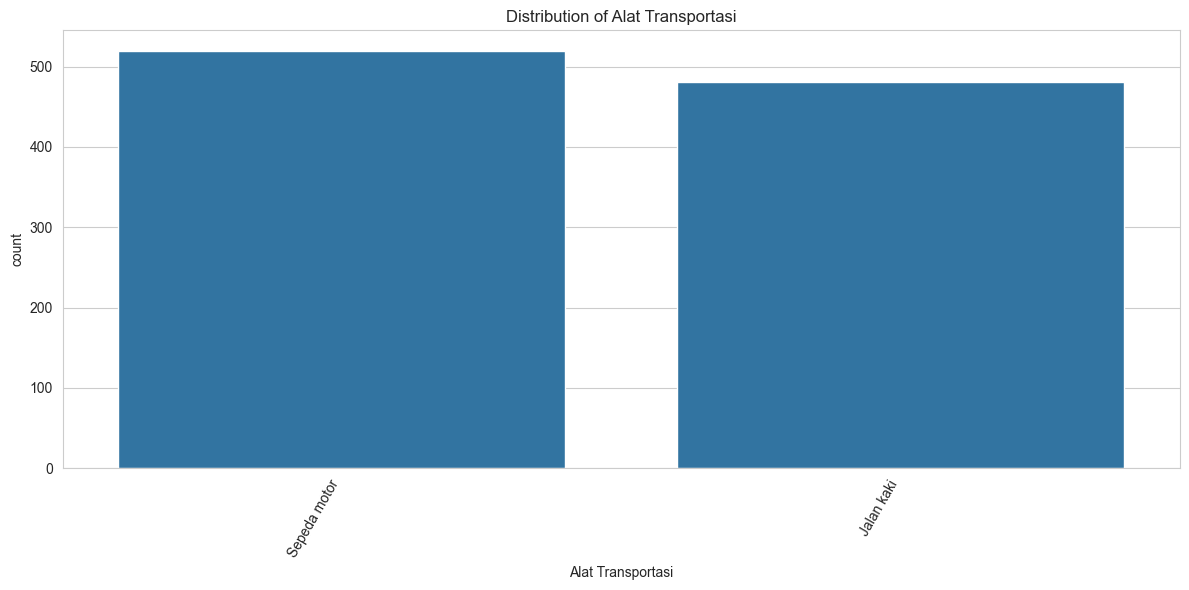

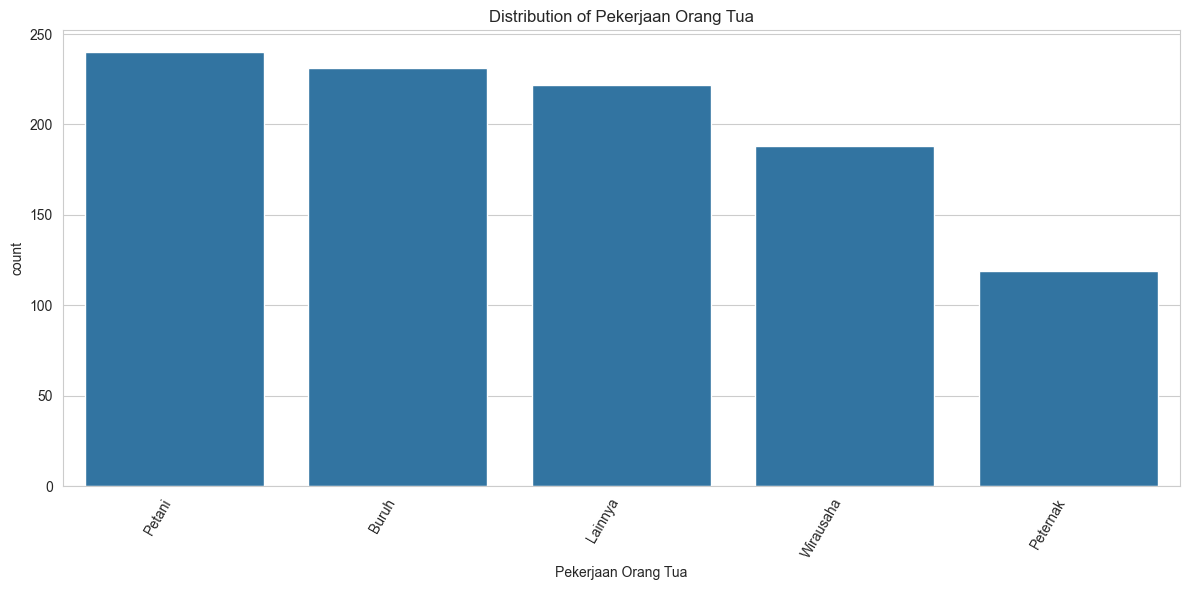

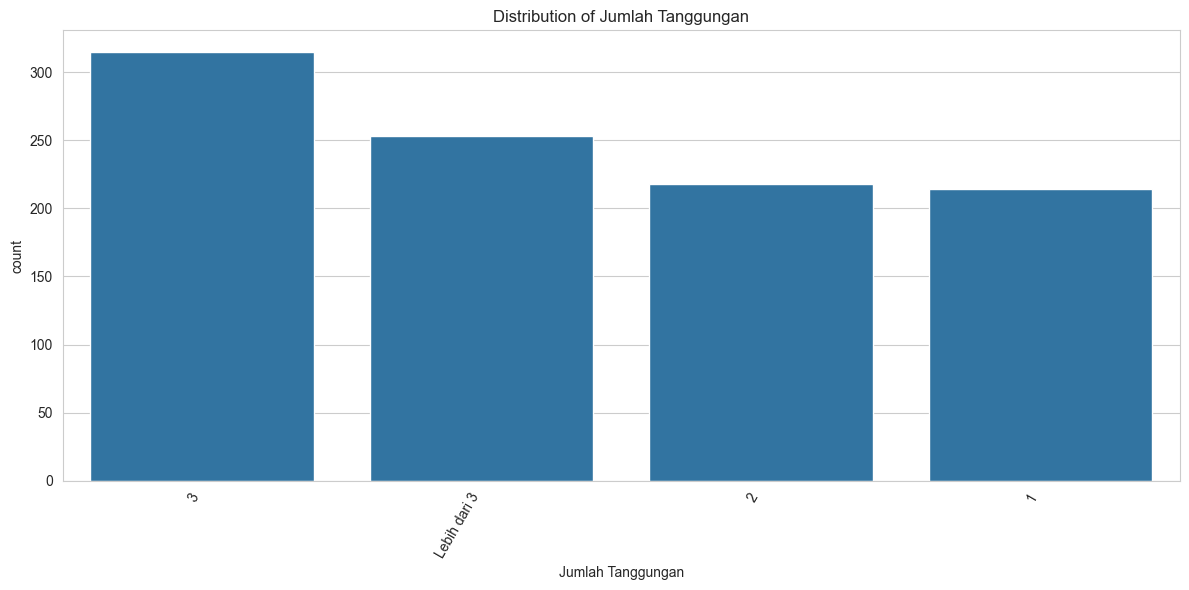

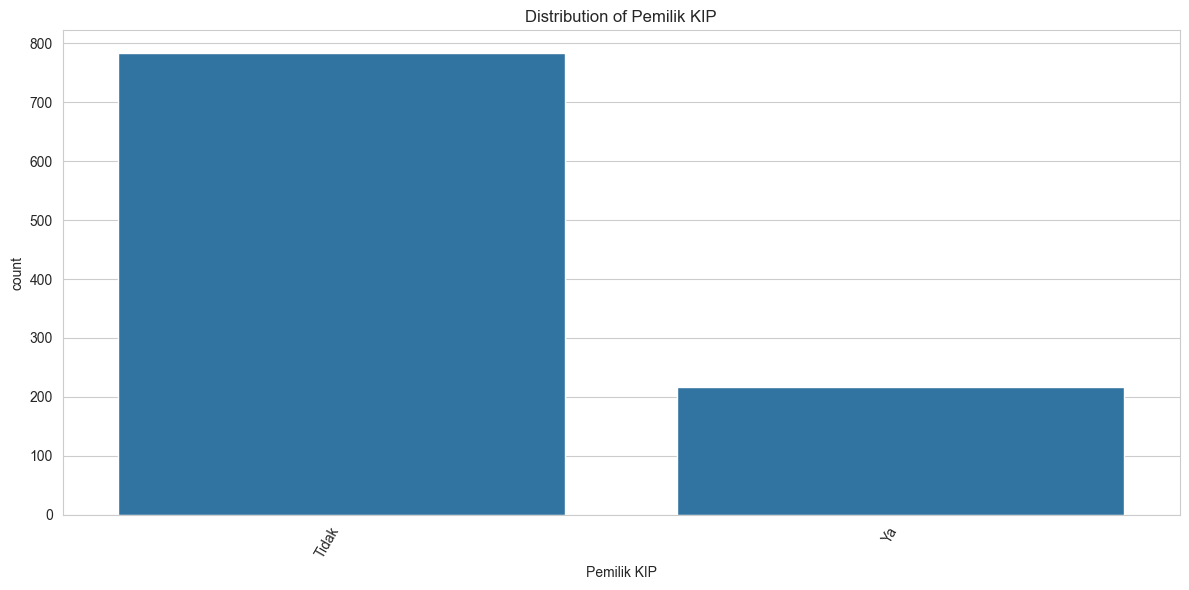

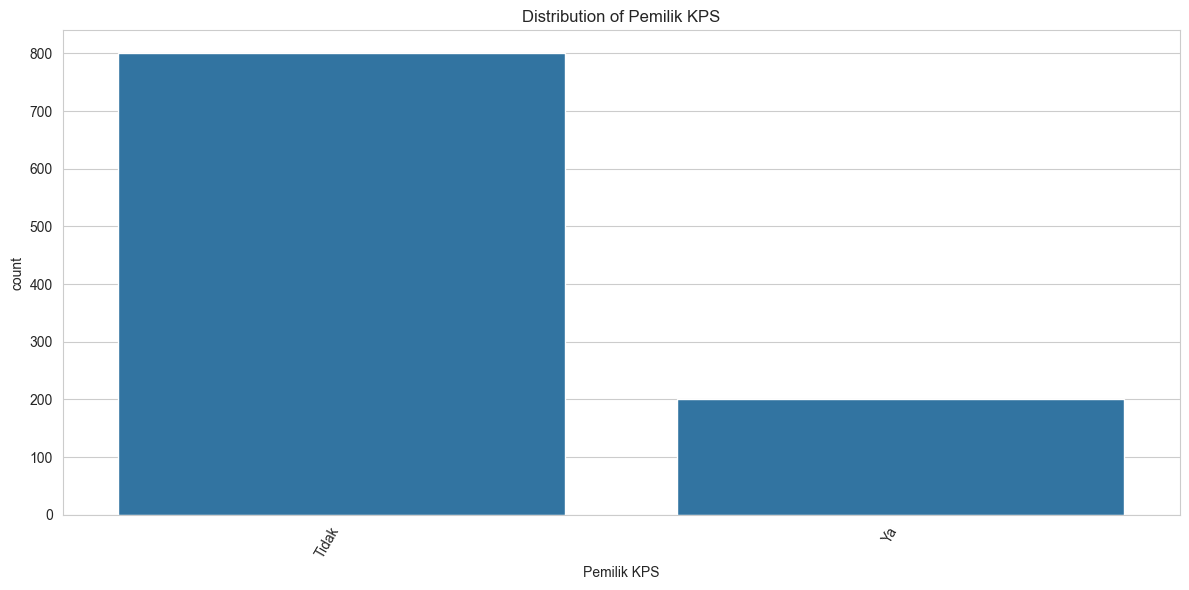

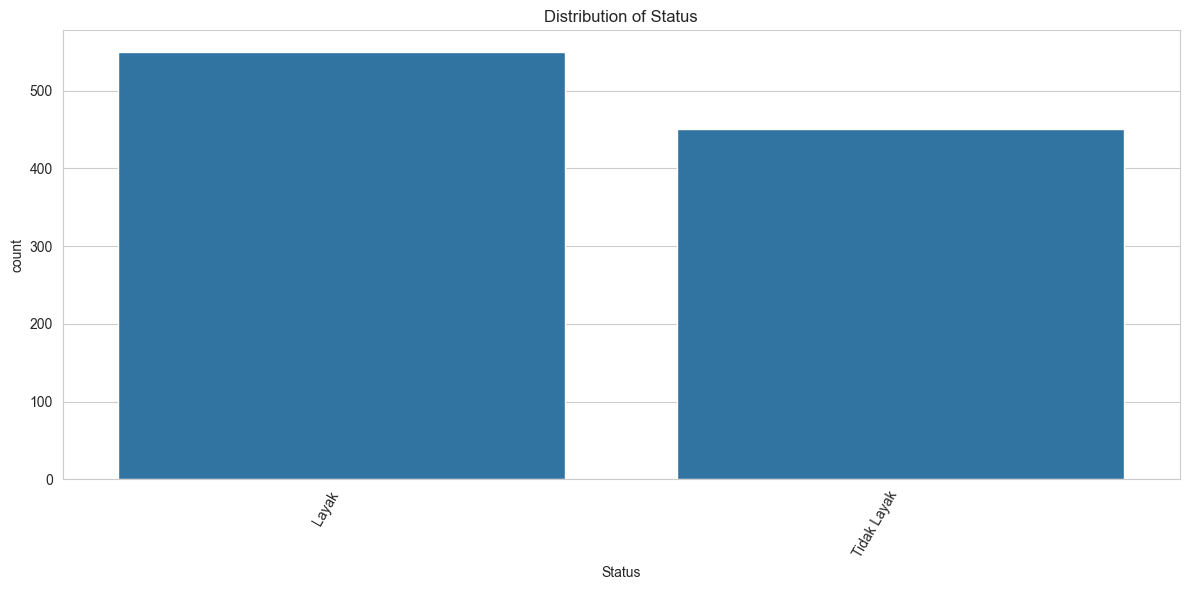

In [27]:
cat_kolom = df.select_dtypes(include=['object']).columns

def plot_top_categories(data, column, top_n=20):
    top_categories = data[column].value_counts().nlargest(top_n).index
    plt.figure(figsize=(12,6))
    sns.countplot(data=data[data[column].isin(top_categories)], x=column, order=top_categories)
    plt.xticks(rotation=60, ha='right')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

for col in cat_kolom:
    plot_top_categories(df, col, top_n=20)


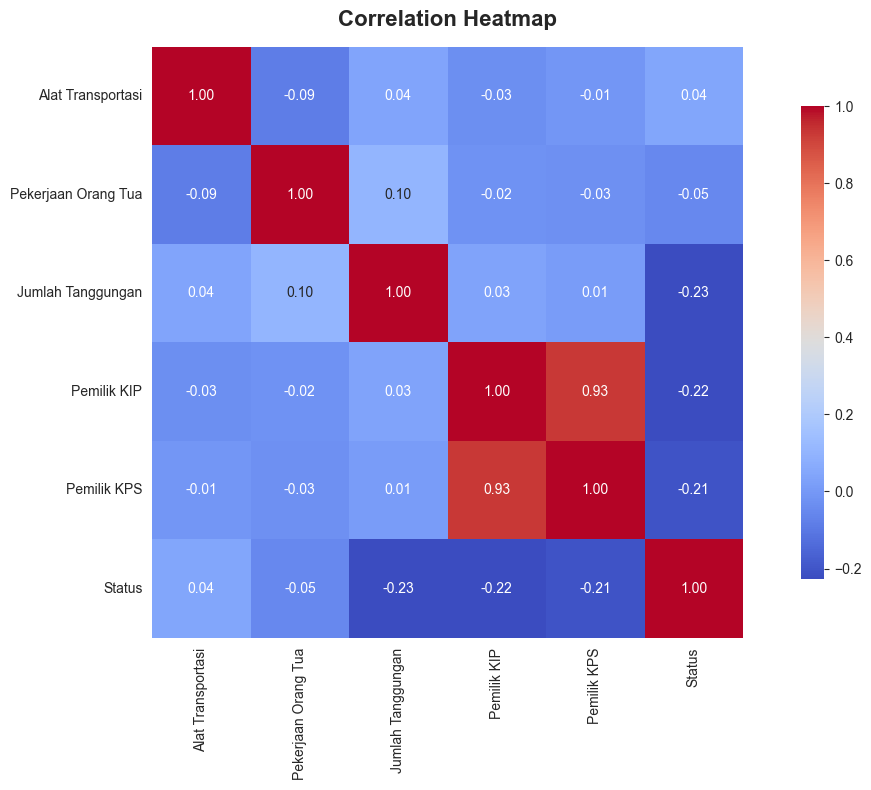

In [28]:
df_heatmap = df[cat_kolom].copy()

# label encoding df heatmap
le = LabelEncoder()

df_heatmap[cat_kolom] = df_heatmap[cat_kolom].apply(le.fit_transform)

# hitung korelasi
corr = df_heatmap.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16, weight='bold', pad=15)
plt.tight_layout()
plt.show()

In [29]:
df.to_excel('../dataset/data_pip_cleaned.xlsx', index=False)